### Requester Decisions
In this notebook, we will see how the good behavior of the requester will affect the decrease of his inventory. we have considered the initial balance
as 20 ether units. you can see the decision tree of the requester below:

![requesterDecisions.jpg](../etc/img/RequesterDecision.jpg)

green lines represent good behavior and red lines represent bad behavior. note that we consider it more bad behavior to unfinish a task than to cancel it.


In [25]:
import random as rand

def randomProperties(initialBalance):
  if initialBalance < 1:
    raise ValueError(initialBalance, "Arg must be grater than 1")
  r = rand.randint(1, initialBalance)
  salary = max(r, initialBalance - r)
  rProof = min(r, initialBalance - r)
  wProof = rand.randint(1, initialBalance)
  return salary, rProof, wProof



def calculateRequesterBalance(requesterInitialBalance, decisionProbability, testCounter):
  if decisionProbability < 0 or decisionProbability > 1:
    raise ValueError(decisionProbability, "Args must be between 0 and 1")
  else:
    result = 0
    for i in range(0, testCounter):
      
      salary, requetserProofOfTrust, workerProofOfTrust = randomProperties(requesterInitialBalance)

      # Requester waits until assign task
      if  rand.random() / 100 <= decisionProbability:

        # Requester waits until verify task
        if  rand.random() * 95 / 100 <= decisionProbability:

          # Requester finished the task
          if  rand.random() * 95 / 100 <= decisionProbability:
          
            result = result + salary
        # Reassign task task
          else:
            repaymentRate = (salary + (requetserProofOfTrust / 4)) / (salary + requetserProofOfTrust)
            result = result + repaymentRate * (requetserProofOfTrust + salary)
        else:
          repaymentRate = (salary + (requetserProofOfTrust / 4)) / (salary + requetserProofOfTrust)
          result = result + repaymentRate * (requetserProofOfTrust + salary)

      # Requester cancels task
      else:
        result = result + requetserProofOfTrust / 5
  return requesterInitialBalance - (result / testCounter)


Finally, we see that the more good behavior the requester is, the lower the amount of account reduction will be.
Note that the initial balance for the worker is 40 units.

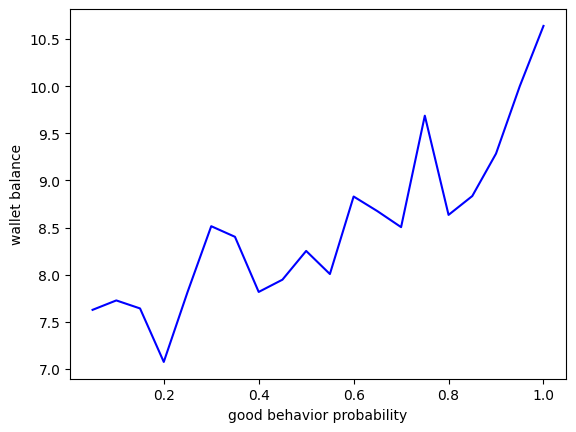

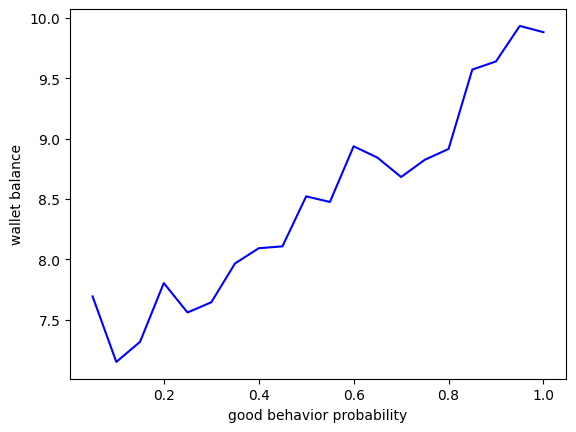

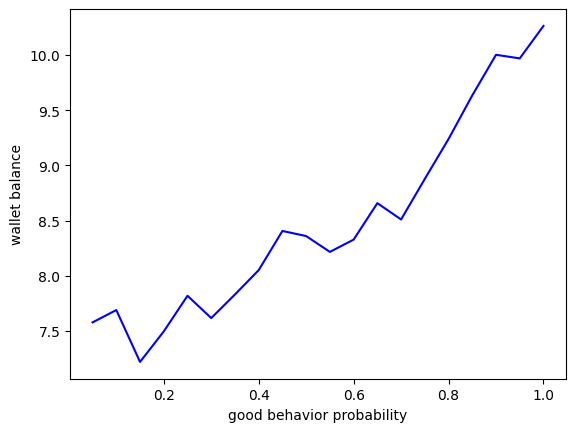

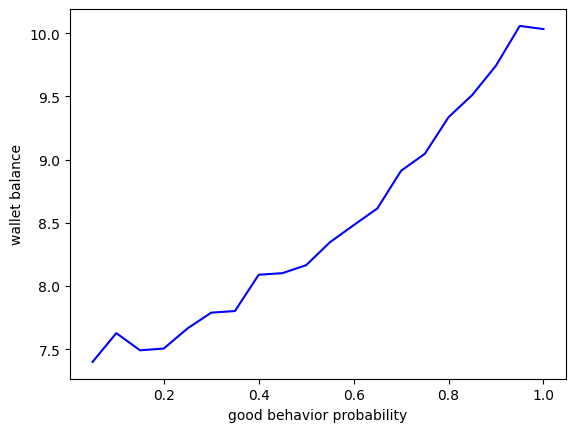

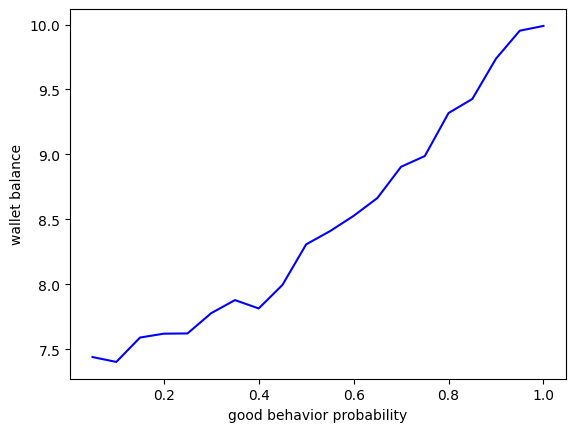

In [26]:
import matplotlib.pyplot as plt
import numpy as np



def showRequesterBalance(testCount):
  requesterInitialBalance = 40
  probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
  outputs = [calculateRequesterBalance(requesterInitialBalance, i, testCount) for i in probabilities]
  plt.plot(probabilities, outputs, 'b-')
  plt.xlabel("good behavior probability")
  plt.ylabel("wallet balance")
  plt.show()

showRequesterBalance(100)
showRequesterBalance(500)
showRequesterBalance(1000)
showRequesterBalance(2000)
showRequesterBalance(4000)


